In [1]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('../datasets/mdb.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-10-19,33.00,34.00,29.100,32.07,11508466
1,2017-10-20,33.37,33.37,30.100,30.68,2358653
2,2017-10-23,30.51,31.33,30.190,30.50,749397
3,2017-10-24,30.46,30.92,30.439,30.57,420725
4,2017-10-25,30.50,31.10,29.880,31.00,1219442


In [3]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High     Low  Close    Volume
0  2017-10-19  33.00  34.00  29.100  32.07  11508466
1  2017-10-20  33.37  33.37  30.100  30.68   2358653
2  2017-10-23  30.51  31.33  30.190  30.50    749397
3  2017-10-24  30.46  30.92  30.439  30.57    420725
4  2017-10-25  30.50  31.10  29.880  31.00   1219442


In [4]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2




            Date    Open    High       Low   Close    Volume  MA for 5 days  \
0     2017-10-19   33.00   34.00   29.1000   32.07  11508466            NaN   
1     2017-10-20   33.37   33.37   30.1000   30.68   2358653            NaN   
2     2017-10-23   30.51   31.33   30.1900   30.50    749397            NaN   
3     2017-10-24   30.46   30.92   30.4390   30.57    420725            NaN   
4     2017-10-25   30.50   31.10   29.8800   31.00   1219442         30.964   
...          ...     ...     ...       ...     ...       ...            ...   
1800  2024-12-16  264.23  274.71  260.3000  265.63   3020356        281.906   
1801  2024-12-17  266.99  269.49  263.1001  265.10   1782440        276.746   
1802  2024-12-18  264.68  265.13  249.1100  252.67   2576329        267.840   
1803  2024-12-19  252.48  255.90  243.3000  245.00   2601869        259.118   
1804  2024-12-20  241.13  248.57  239.1800  245.63   3307375        254.806   

      MA for 10 days  MA for 20 days  MA for 50 day

,count,mean,std,min,25%,50%,75%,max
Open,1805.0,2.388549e+02,1.327430e+02,25.620000,134.870000,2.305300e+02,3.551600e+02,5.850300e+02
High,1805.0,2.446706e+02,1.355226e+02,26.030000,138.890000,2.358700e+02,3.620300e+02,5.900000e+02
Low,1805.0,2.330721e+02,1.298041e+02,24.620000,131.521600,2.252500e+02,3.490900e+02,5.665701e+02
Close,1805.0,2.388474e+02,1.325226e+02,25.760000,135.320000,2.309500e+02,3.553100e+02,5.850300e+02
Volume,1805.0,1.276362e+06,1.026261e+06,74505.000000,709497.000000,1.057672e+06,1.537746e+06,1.254206e+07
MA for 5 days,1801.0,2.390669e+02,1.321125e+02,26.190000,135.570000,2.297800e+02,3.561220e+02,5.708960e+02
MA for 10 days,1796.0,2.393165e+02,1.316696e+02,26.702000,136.049750,2.297910e+02,3.548055e+02,5.673020e+02
MA for 20 days,1786.0,2.397038e+02,1.307261e+02,27.629500,137.444125,2.352883e+02,3.536349e+02,5.434005e+02
MA for 50 days,1756.0,2.409872e+02,1.281823e+02,28.112600,139.969650,2.408628e+02,3.546304e+02,5.218732e+02
EMA for 5 days,1805.0,2.385992e+02,1.321411e+02,26.438143,134.760239,2.305757e+02,3.563192e+02,5.687741e+02


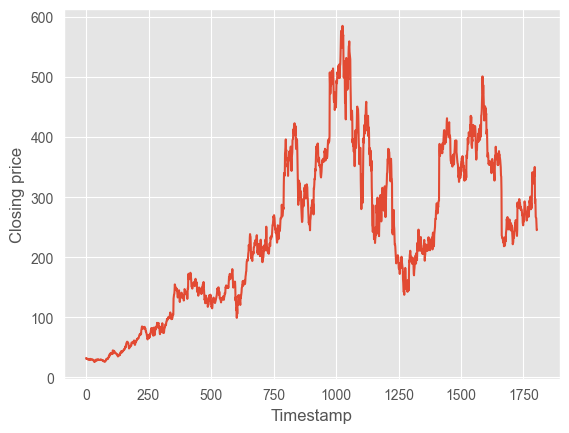

In [5]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [6]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14,MACD
49,2017-12-29,30.35,30.3900,29.5200,29.68,324587,29.254,29.022,28.1060,29.2480,29.414513,29.026543,28.775329,29.299191,64.871017,0.113088
50,2018-01-02,29.93,30.0800,28.8550,29.25,231621,29.414,29.005,28.1785,29.1916,29.359676,29.067172,28.820536,29.297262,59.552358,0.130456
51,2018-01-03,29.31,29.4200,28.9400,29.15,256707,29.484,29.090,28.2680,29.1610,29.289784,29.082231,28.851913,29.291487,50.716332,0.134599
52,2018-01-04,29.29,29.4900,28.9000,29.05,198884,29.474,29.190,28.4130,29.1320,29.209856,29.076371,28.870779,29.282017,59.529148,0.128335
53,2018-01-05,29.09,29.1350,28.5900,29.05,205632,29.236,29.145,28.5220,29.1016,29.156571,29.071576,28.887848,29.272918,55.651106,0.121964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2019-12-18,129.29,132.3900,128.5600,129.18,1059895,128.794,129.470,137.4205,131.6157,129.554616,131.005356,132.953574,133.502397,27.692308,-1.622007
545,2019-12-19,130.60,132.9000,128.5700,130.96,861351,130.040,129.429,136.5810,131.5655,130.023077,130.997109,132.763710,133.402695,31.071276,-1.553484
546,2019-12-20,131.25,132.6899,129.6600,130.68,836492,130.494,129.380,135.7915,131.5297,130.242052,130.939453,132.565261,133.295923,40.591023,-1.504430
547,2019-12-23,130.75,133.2900,130.1100,132.36,641720,130.514,129.515,135.0135,131.4507,130.948034,131.197734,132.545713,133.259220,34.024768,-1.314836


In [7]:
# updated Code

feature_columns = [
    'Close',          # Most important feature (direct price information)
    'Low',            # Important price-related feature
    'High',           # Important price-related feature
    'Open',           # Important price-related feature
    'EMA for 5 days', # Short-term trend indicator
    'MA for 5 days',  # Short-term trend indicator
    'RSI_14'          # Momentum indicator
]

from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 15

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, df.columns.get_loc('Close')]  # Normalize using "Close" price
    temp = []
    temp2 = []
    
    for j in range(window_size):
        # Normalize each feature in the feature_columns list
        normalized_features = []
        for feature in feature_columns:
            if feature == 'Close':
                # Normalize "Close" relative to the first_close
                normalized_value = (df.iloc[i + j, df.columns.get_loc(feature)] - first_close) / first_close
            else:
                # For other features, normalize them directly (or use their raw values if normalization isn't required)
                normalized_value = df.iloc[i + j, df.columns.get_loc(feature)]
            normalized_features.append(normalized_value)
        
        # Append the normalized features for this time step
        temp.append(normalized_features)
    
    # Calculate the target (normalized change in "Close" price)
    target = (df.iloc[i + window_size, df.columns.get_loc('Close')] - first_close) / first_close
    temp2.append(target)
    
    # Append the input and target to X and Y
    X.append(np.array(temp))  # Each sample has shape (window_size, len(feature_columns))
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Verify the shape of train_X
print("Shape of train_X before reshaping:", train_X.shape)

# Reshaping the data for CNN models
# Assuming train_X has shape (num_samples, window_size, num_features)
train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1], train_X.shape[2])  
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1], test_X.shape[2])

# Printing the number of training and testing samples
print("Shape of train_X after reshaping:", train_X.shape)
print("Shape of test_X after reshaping:", test_X.shape)
print("Number of training samples:", len(train_X))
print("Number of testing samples:", len(test_X))

Shape of train_X before reshaping: (1391, 15, 7)
Shape of train_X after reshaping: (1391, 1, 15, 7)
Shape of test_X after reshaping: (348, 1, 15, 7)
Number of training samples: 1391
Number of testing samples: 348


In [8]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [10]:
from keras.models import load_model

# load the model
model = load_model('improved_cnn_lstm_model.keras')

c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 36 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [12]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.826486
R2 Score: 0.826486
Max Error: 0.283217


In [13]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [14]:
def plot_predictions(test_label, predicted, title="Stock Price Prediction"):
    # Create figure and axis with specified size
    plt.figure(figsize=(15, 7))
    
    # Plot actual prices
    plt.plot(test_label, label='Actual Price', color='green')
    
    # Plot predicted prices
    plt.plot(predicted, label='Predicted Price', color='red')
    
    # Customize the plot
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add margins for better visibility
    plt.margins(x=0.02)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()

def plot_predictions_with_dates(test_label, predicted, dates, title="Stock Price Prediction"):
    plt.figure(figsize=(15, 6))
    
    # Plot with dates
    plt.plot(dates, test_label, label='Actual Price', color='blue', linewidth=2)
    plt.plot(dates, predicted, label='Predicted Price', color='red', linestyle='--', linewidth=2)
    
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Format date axis
    plt.gcf().autofmt_xdate()  # Angle and align the tick labels
    
    plt.tight_layout()
    plt.show()

In [18]:
from scipy.signal import savgol_filter

def plot_predictions(test_label, predicted, title="Actual V Stock Price Prediction"):
    # Apply smoothing to both lines
    window_length = 5  # Must be odd; adjust this value to control smoothing amount
    polyorder = 1
    
    # Smooth both actual and predicted values
    test_label_smooth = savgol_filter(test_label.flatten(), window_length, polyorder)
    predicted_smooth = savgol_filter(predicted.flatten(), window_length, polyorder)
    
    plt.figure(figsize=(15, 6))
    
    # Plot smoothed lines
    plt.plot(test_label_smooth, label='Actual Price', color='red')
    plt.plot(predicted_smooth, label='Predicted Price', color='blue')
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

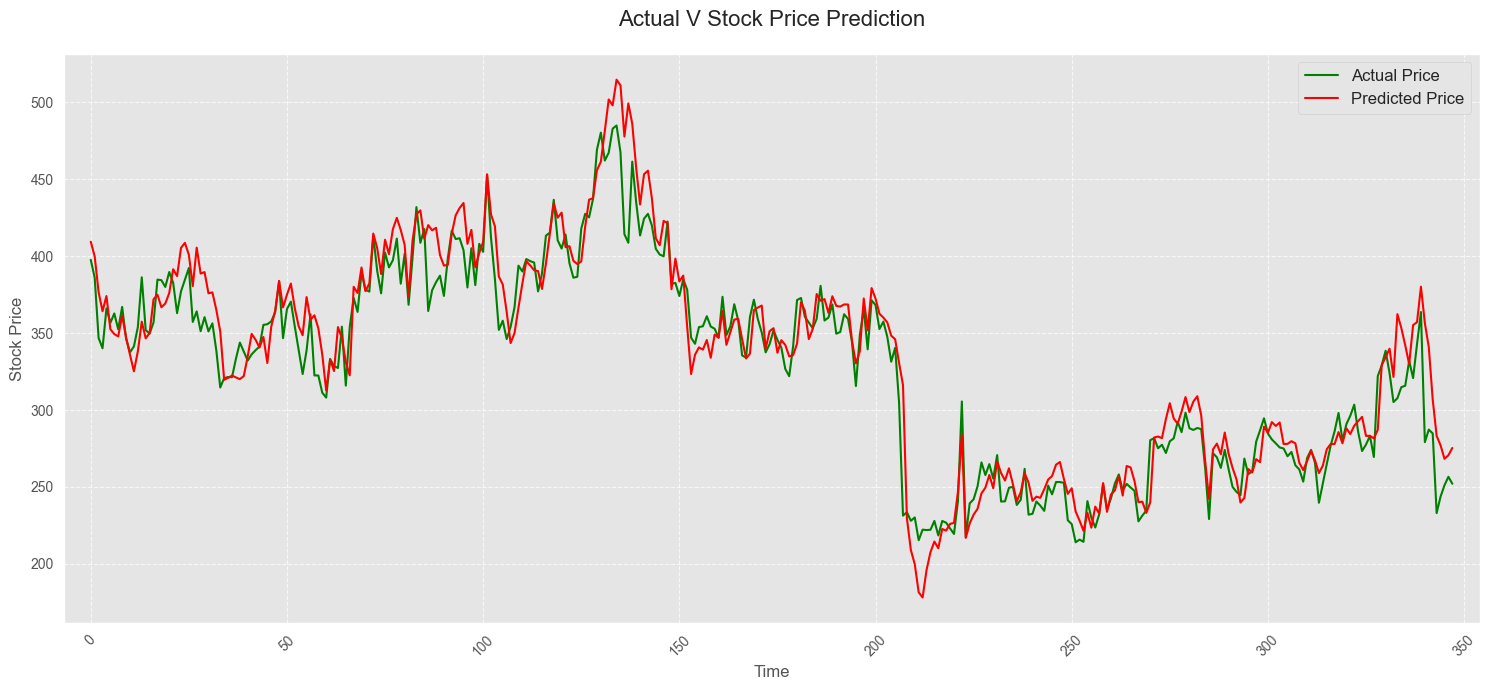

In [15]:
plot_predictions(test_label, predicted, "Actual V Stock Price Prediction")

In [16]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 355.88282848781876
Root Mean Squared Error (RMSE): 18.864856969715376
Mean Absolute Error (MAE): 13.853673359914819
Mean Absolute Percentage Error (MAPE): 4.34%


Text(0, 0.5, 'Closing price')

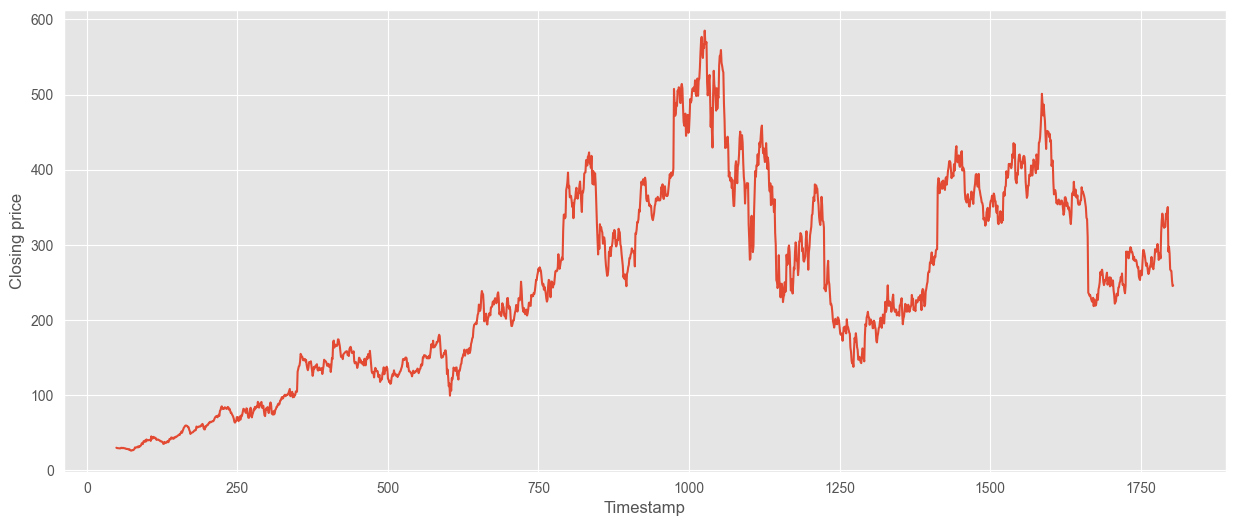

In [17]:
# plot the full dataset

plt.figure(figsize=(15, 6))
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")


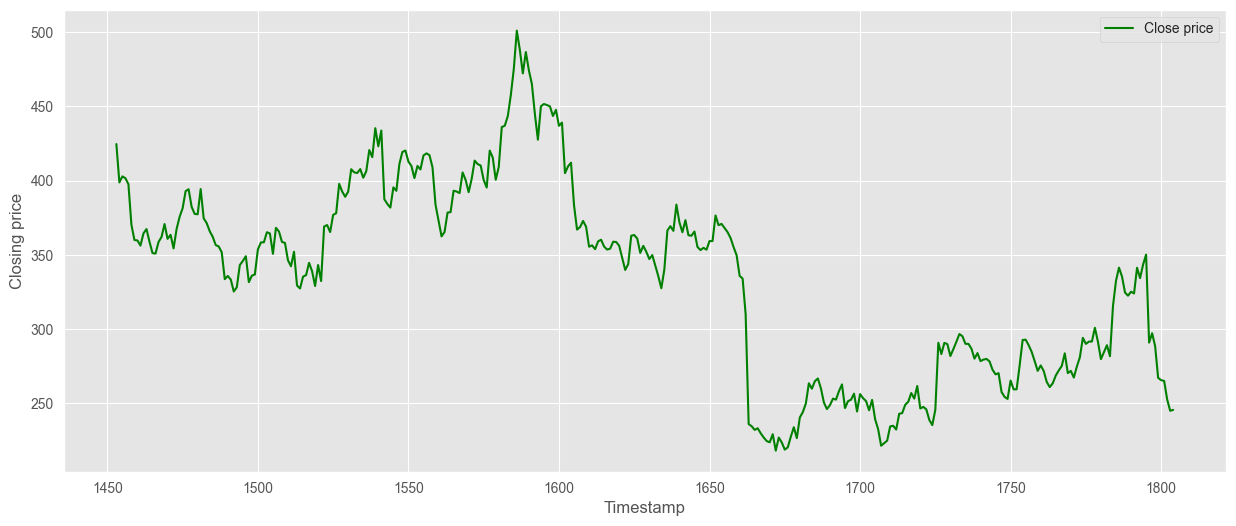

In [19]:
# Plot the last 20% of the data

plt.figure(figsize=(15, 6))
last_20_percent = data['Close'].iloc[int(len(data) * 0.8):]
plt.plot(last_20_percent.index, last_20_percent.values, label="Close price", color='green')
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.legend()

In [20]:
# save the model
model.save('improved_cnn_lstm_model.h5')